In [61]:
import os
import urllib
import tarfile

DOWNLOAD_ROOT='https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH=os.path.join(os.getcwd(), 'datasets', 'housing')
HOUSING_URL=DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [81]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [84]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [85]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [86]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c6d73c470>,
      dtype=object)

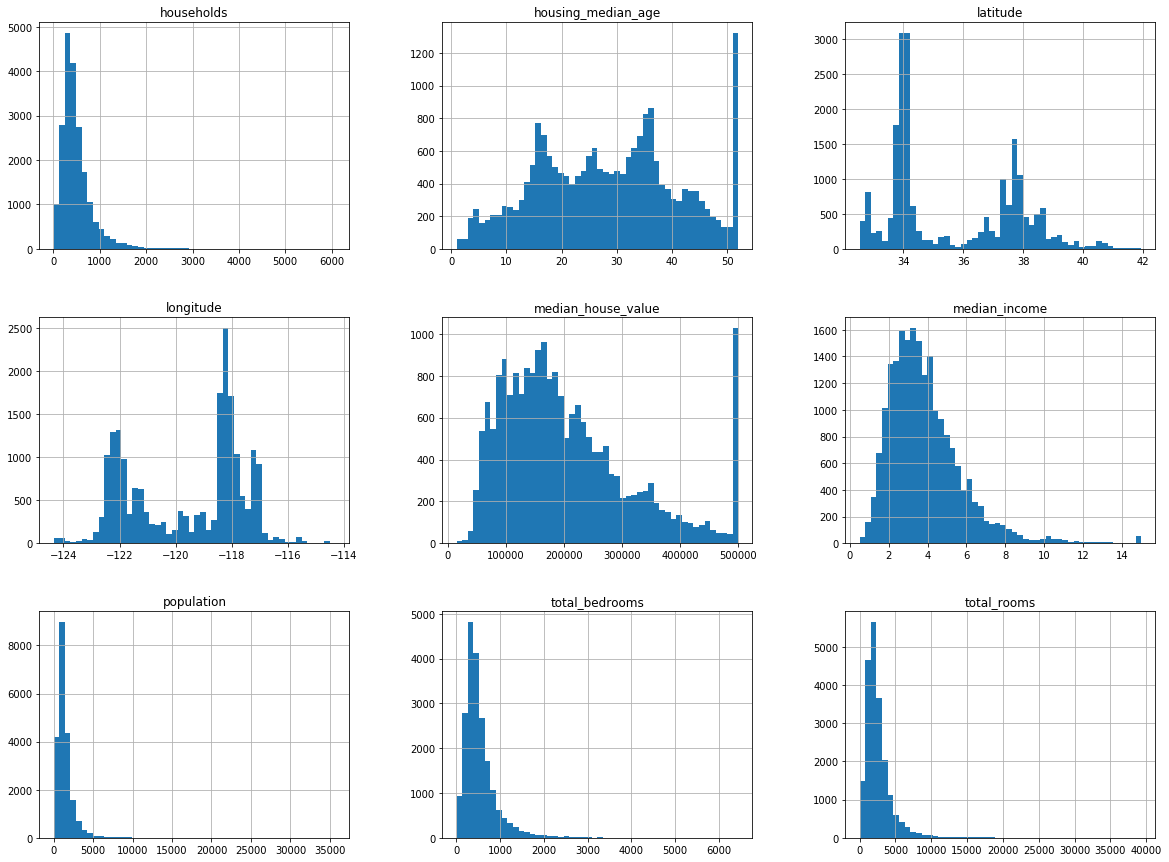

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))

In [88]:
# TRAIN TEST SPLIT
# import numpy as np
#
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
#
# train_set, test_set = split_train_test(housing, 0.2)

# TRAIN TEST SPLIT
# from zlib import crc32
#
# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
#
# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda _id: test_set_check(_id, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]
#
# housing_with_id = housing.reset_index()
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

# TRIAN TEST SPLIT
# from sklearn.model_selection import train_test_split
#
# train_set_X, test_set_X = train_test_split(housing_X, test_size=0.2, random_state=1)

from sklearn.model_selection import StratifiedShuffleSplit

housing['income_categories'] = pd.cut(housing['median_income'],
                                   bins=[0, 1.5, 3, 4.5, 6, np.inf],
                                   labels=[1,2,3,4,5])

stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_shuffle_split.split(housing, housing['income_categories']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

print((train_set['income_categories'].value_counts() / len(train_set)) / 
            (housing['income_categories'].value_counts() / len(housing)))

housing.drop('income_categories', axis=1, inplace=True)

3    1.000035
2    1.000038
4    0.999931
5    0.999682
1    1.000608
Name: income_categories, dtype: float64


In [89]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   
...           ...         ...            ...                 ...   
6563        573.0       210.0         4.9312            240200.0   
12053      1052.0       258.0         2.0682            113000.0   
13908      2098.0       765.0         3.2723             97800.0   
11159      1356.0       356.0         4.0625            225900.0   
15775      1269.0       639.0         3.5750            500001.0   

      ocean_proximity income_categories  
17606       <1H OCEAN                 2  
18632       <1H OCEAN                 5  
14650      NEAR OCEAN                 2  
3230           INLAND                 2  
3555        <1H OCEAN                 3  
...               ...               ...  
6563           INLAND                 4  
12053          INLAND                 2  
13908          INLAND                 3  
11159       <1H OCEAN                 3  
15775        NEAR BAY                 3  

[16512 rows x 11 columns]

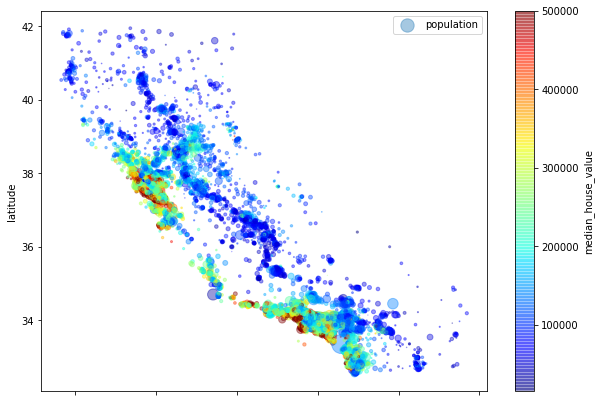

In [90]:
train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=train_set['population']/100,
              label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

/home/codejamninja/.pyenv/versions/3.6.9/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


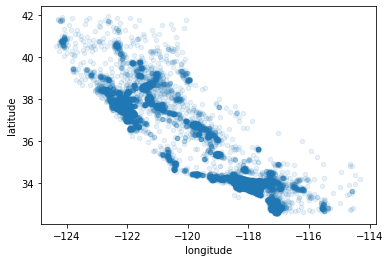

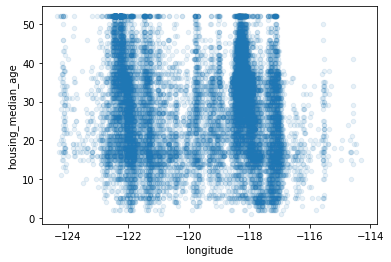

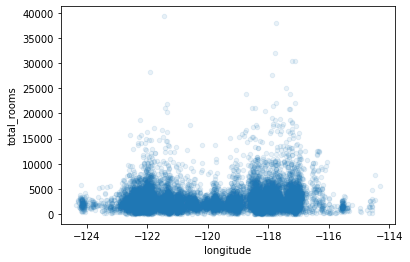

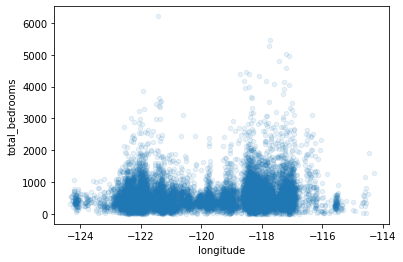

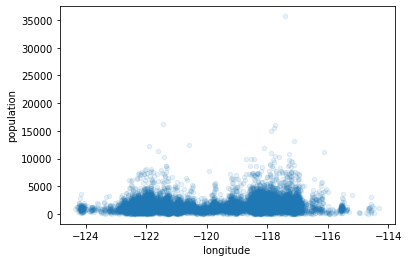

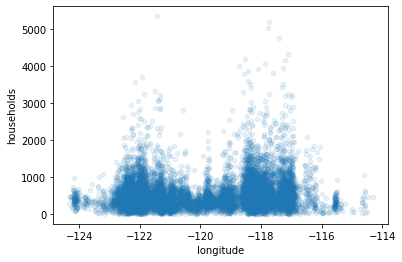

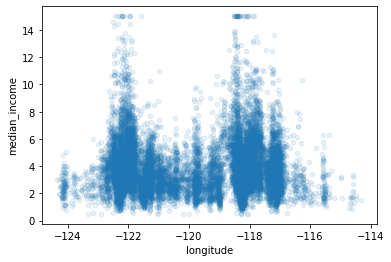

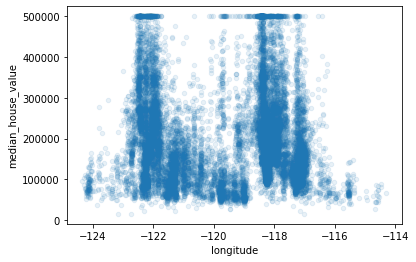

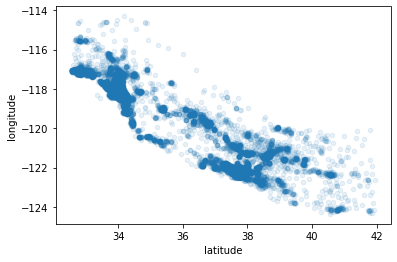

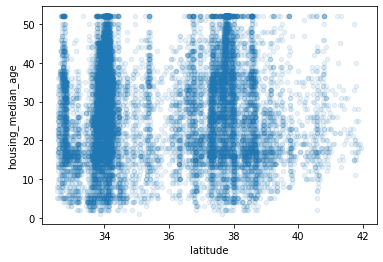

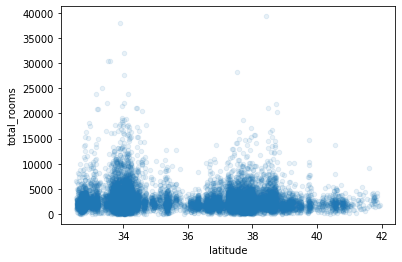

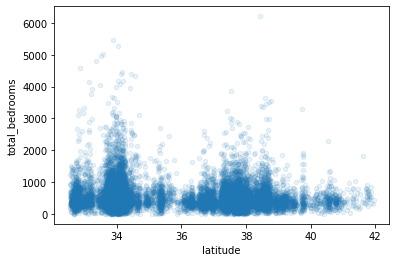

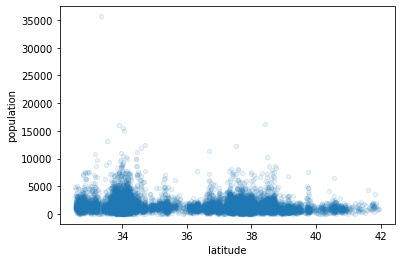

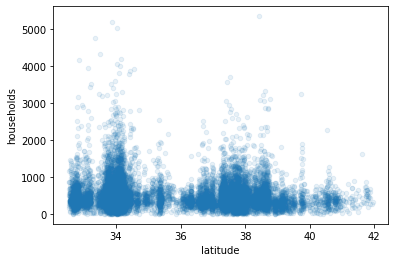

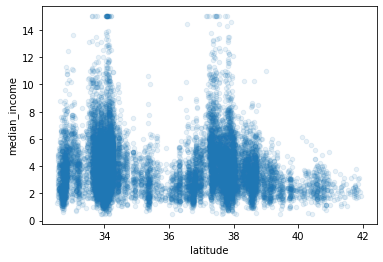

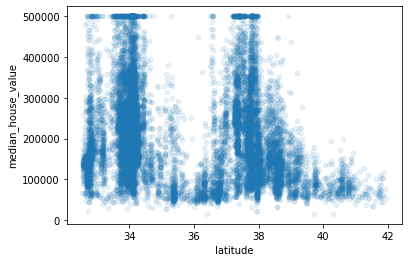

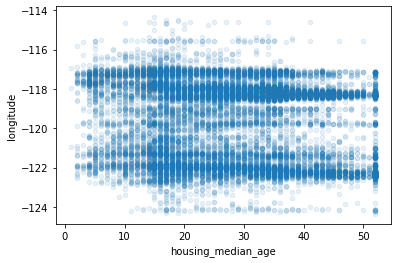

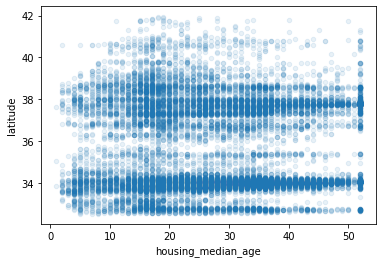

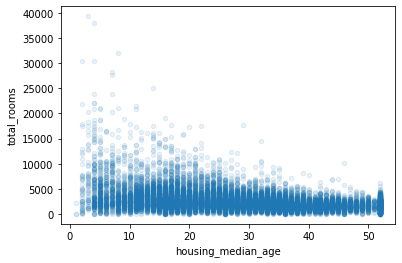

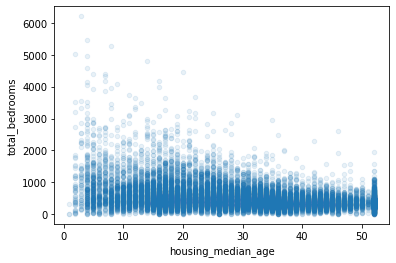

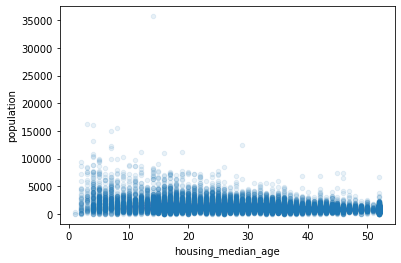

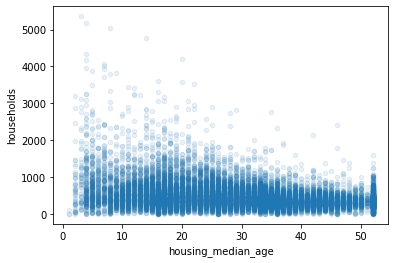

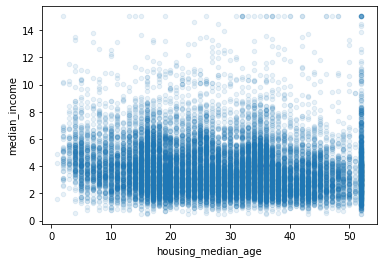

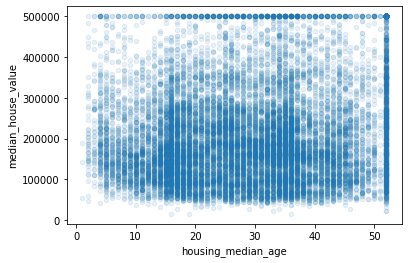

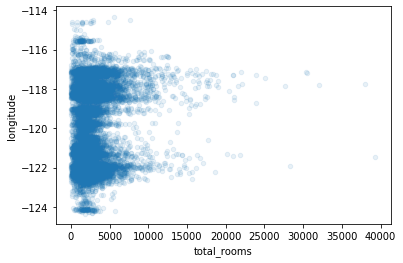

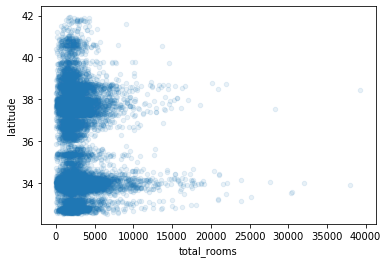

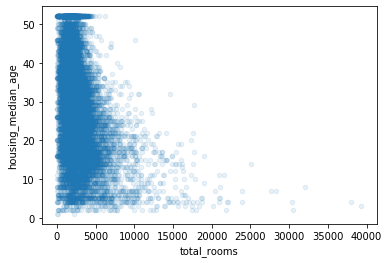

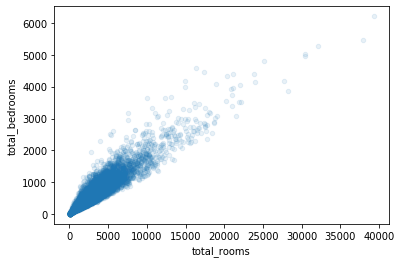

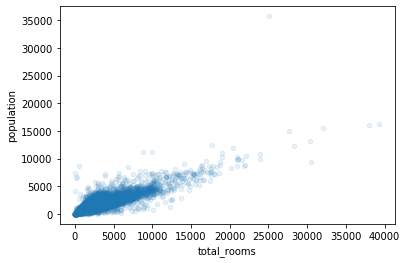

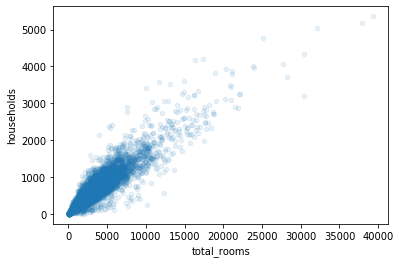

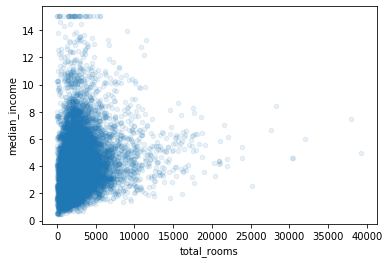

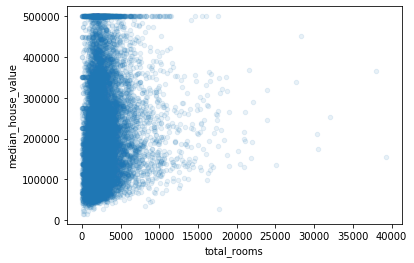

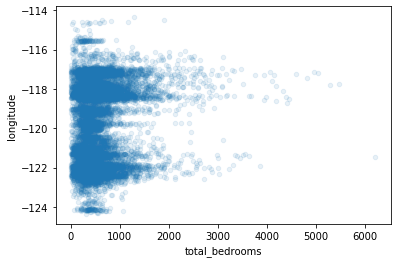

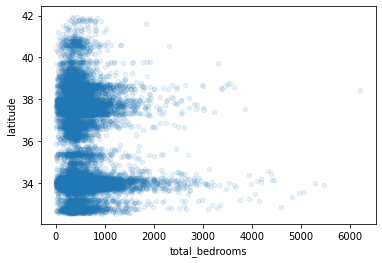

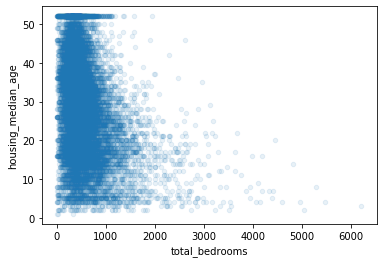

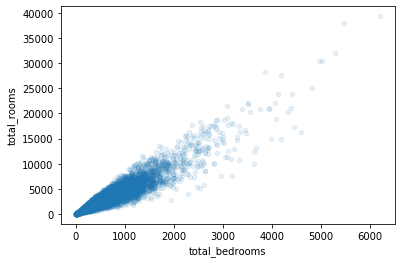

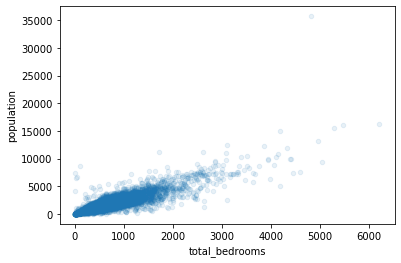

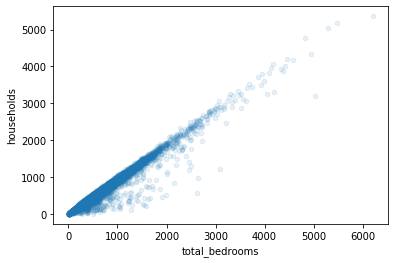

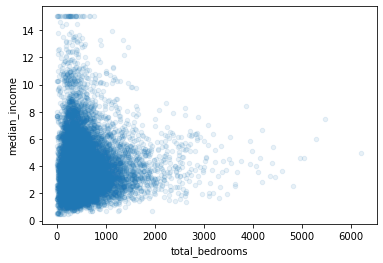

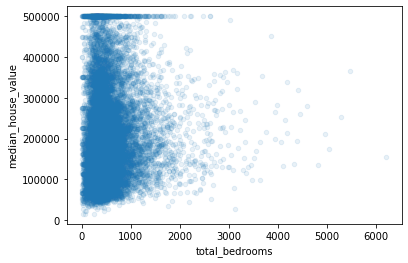

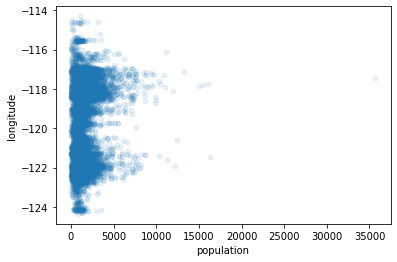

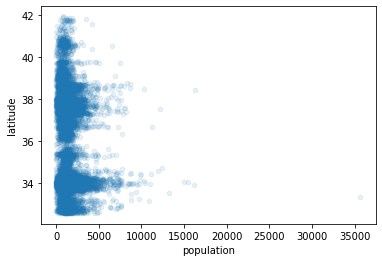

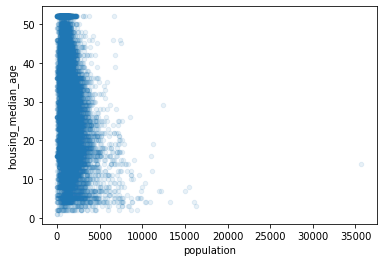

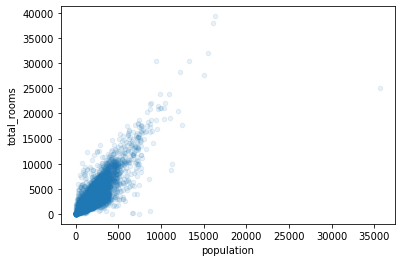

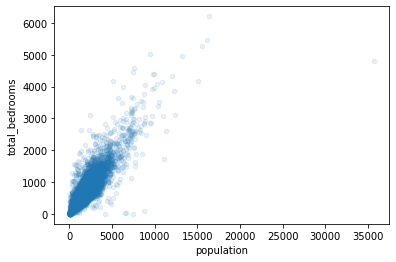

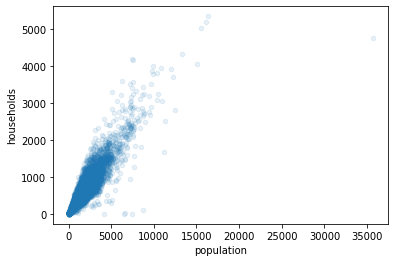

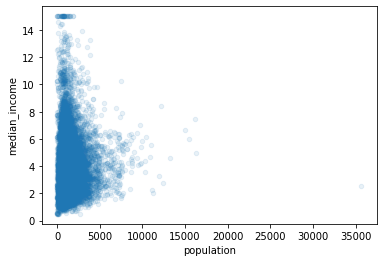

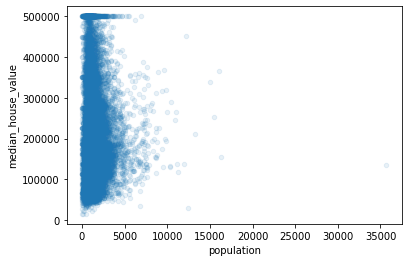

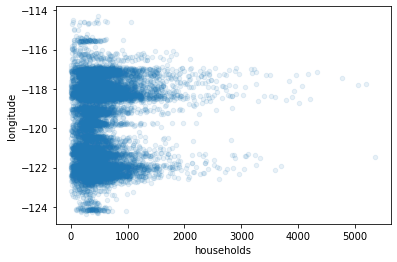

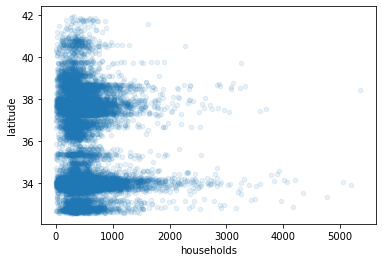

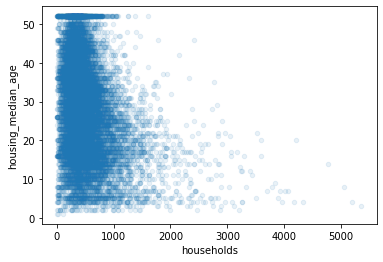

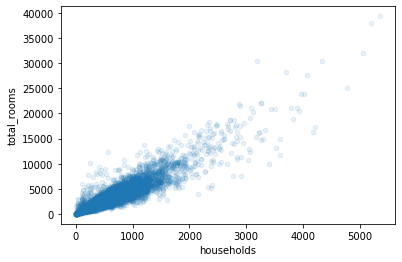

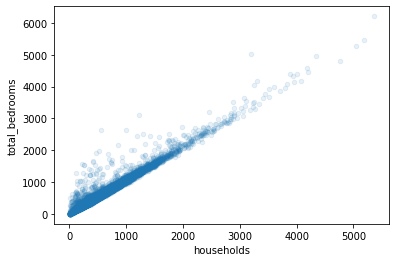

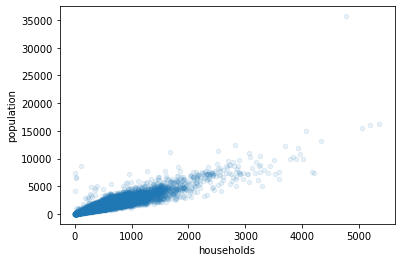

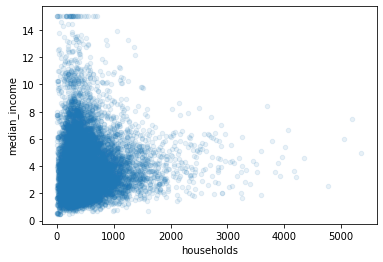

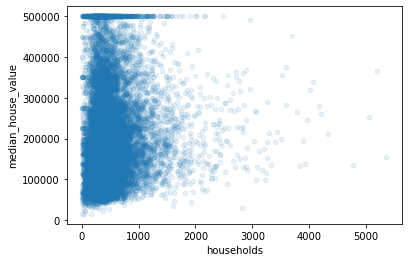

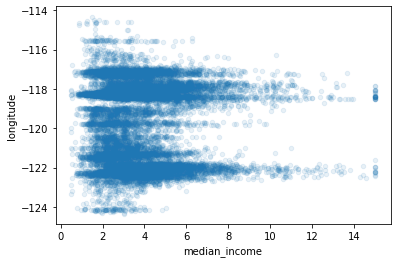

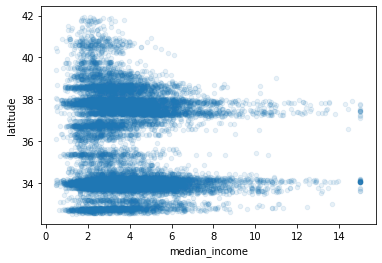

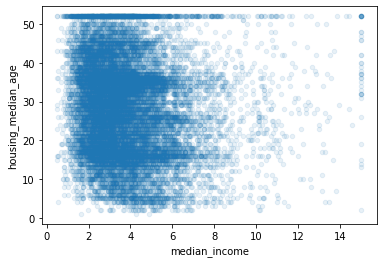

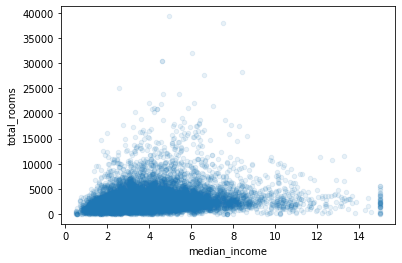

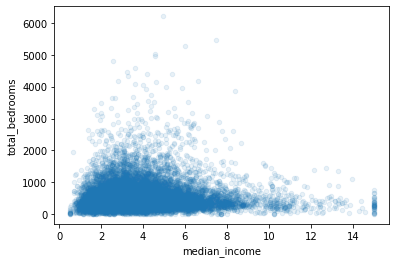

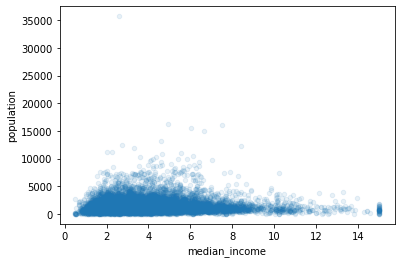

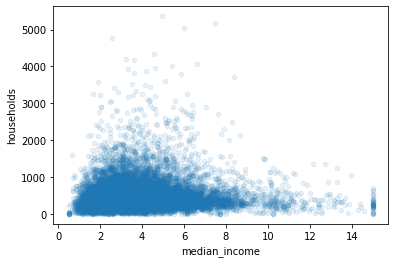

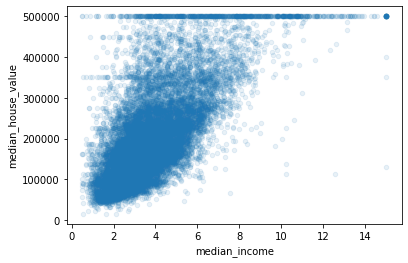

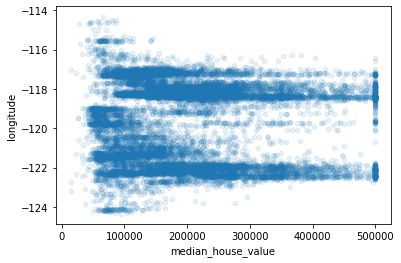

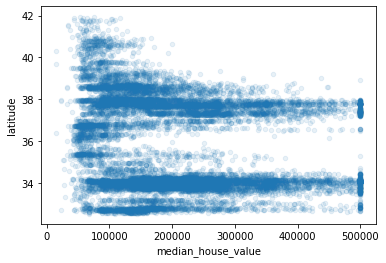

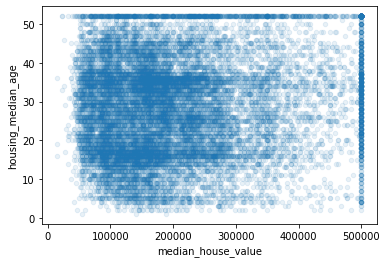

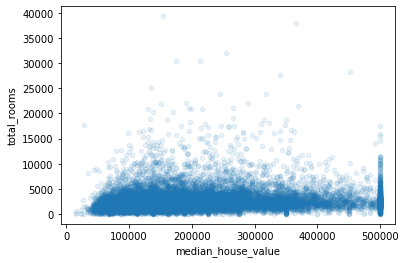

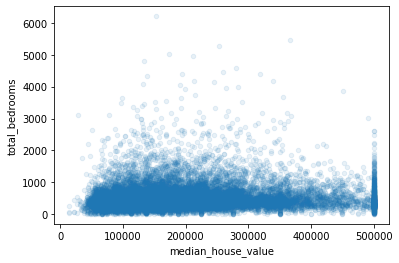

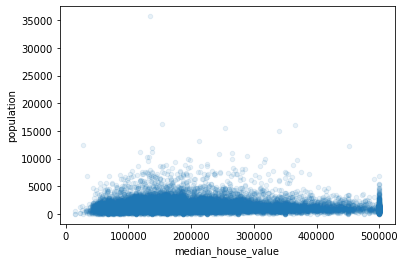

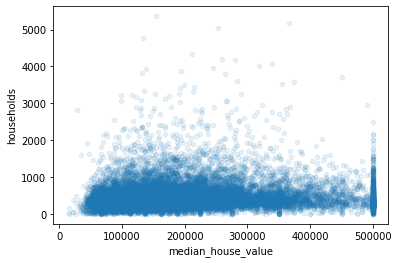

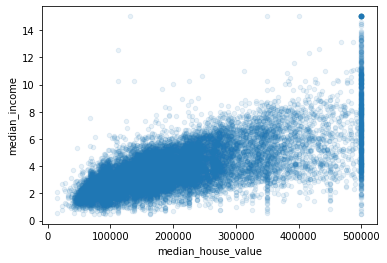

In [91]:
def plot_against(X, against_column):
    for column in X.columns:
        if column != against_column and (isinstance(X[column].values[0], float)
          or isinstance(X[column].values[0], int)):
            X.plot(kind='scatter', x=against_column, y=column, alpha=0.1)

def plot_against_all(X):
    for column in X.columns:
        if isinstance(X[column].values[0], float) or isinstance(X[column].values[0], int):
            plot_against(X, column)
            
plot_against_all(train_set)

In [92]:
train_set.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360   
total_rooms               0.929379    0.855109    0.918392       0.200087   
total_bedrooms            1.000000    0.876320    0.980170      -0.009740   
population                0.876320    1.000000    0.904637       0.002380   
households                0.980170    0.904637    1.000000       0.010781   
median_income            -0.009740    0.002380    0.010781       1.000000   
median_house_value        0.047689   -0.026920    0.064506       0.687160   

                    median_house_value  
longitude                    -0.047432  
latitude                     -0.142724  
housing_median_age            0.114110  
total_rooms                   0.135097  
total_bedrooms                0.047689  
population                   -0.026920  
households                    0.064506  
median_income                 0.687160  
median_house_value            1.000000

In [94]:
train_set_X = train_set.drop('median_house_value', axis=1)
train_set_y = train_set['median_house_value'].copy()

train_set_X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income ocean_proximity income_categories  
17606       710.0       339.0         2.7042       <1H OCEAN                 2  
18632       306.0       113.0         6.4214       <1H OCEAN                 5  
14650       936.0       462.0         2.8621      NEAR OCEAN                 2  
3230       1460.0       353.0         1.8839          INLAND                 2  
3555       4459.0      1463.0         3.0347       <1H OCEAN                 3  
...           ...         ...            ...             ...               ...  
6563        573.0       210.0         4.9312          INLAND                 4  
12053      1052.0       258.0         2.0682          INLAND                 2  
13908      2098.0       765.0         3.2723          INLAND                 3  
11159      1356.0       356.0         4.0625       <1H OCEAN                 3  
15775      1269.0       639.0         3.5750        NEAR BAY                 3  

[16512 rows x 10 columns]

In [97]:
train_set_y

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [98]:
# ORDINAL ENCODING
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# ordinal_encoder.fit_transform(housing[['ocean_proximity']])

# ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
x = one_hot_encoder.fit_transform(train_set_X[['ocean_proximity']])
print(one_hot_encoder.categories_)
x.toarray()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [99]:
# DROP CORRESPONDING DISTRICTS
# housing.dropna(subset['total_bedrooms'])
# housing.dropna(subset['bedrooms_per_room'])

# DROP ATTRIBUTE
# housing.drop('total_bedrooms', axis=1)
# housing.drop('bedrooms_per_room', axis=1)

# MEDIAN
# housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)
# housing['bedrooms_per_room'].fillna(housing['bedrooms_per_room'].median(), inplace=True)

from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='median')
X = train_set_X.drop('ocean_proximity', axis=1)
simple_imputer.fit_transform(X)

array([[-121.89  ,   37.29  ,   38.    , ...,  339.    ,    2.7042,
           2.    ],
       [-121.93  ,   37.05  ,   14.    , ...,  113.    ,    6.4214,
           5.    ],
       [-117.2   ,   32.77  ,   31.    , ...,  462.    ,    2.8621,
           2.    ],
       ...,
       [-116.4   ,   34.09  ,    9.    , ...,  765.    ,    3.2723,
           3.    ],
       [-118.01  ,   33.82  ,   31.    , ...,  356.    ,    4.0625,
           3.    ],
       [-122.45  ,   37.77  ,   52.    , ...,  639.    ,    3.575 ,
           3.    ]])

In [100]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    total_rooms_ix, total_bedrooms_ix, population_ix, households_ix = 3,4,5,6

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if hasattr(X, 'values'):
            X = X.values
        rooms_per_household = X[:,self.total_rooms_ix]/X[:,self.households_ix]
        bedrooms_per_room = X[:,self.total_bedrooms_ix]/X[:,self.total_rooms_ix]
        population_per_household = X[:,self.population_ix]/X[:,self.households_ix]
        return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household]

    def transform_df(self, X, y=None):
        X_ = self.transform(X.values, y)
        X['rooms_per_household'] = X_np[:,len(X[0])-1]
        X['bedrooms_per_room'] = X_np[:,len(X[0])-2]
        X['population_per_household'] = X_np[:,len(X[0])-3]
        return X_p

combined_attributes_adder = CombinedAttributesAdder()
combined_attributes_adder.transform(train_set_X)

array([[-121.89, 37.29, 38.0, ..., 4.625368731563422,
        0.22385204081632654, 2.094395280235988],
       [-121.93, 37.05, 14.0, ..., 6.008849557522124,
        0.15905743740795286, 2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 4.225108225108225, 0.24129098360655737,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 6.34640522875817, 0.1796086508753862,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., 5.50561797752809, 0.19387755102040816,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 4.843505477308295,
        0.22035541195476574, 1.9859154929577465]], dtype=object)

In [101]:
# from sklearn.preprocessing import MinMaxScaler
#
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit_transform(housing.values)

# from sklearn.preprocessing import StandardScaler
#
# standard_scaler = StandardScaler()
# standard_scaler.fit_transform(housing)

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_train_set_X = train_set_X.drop('ocean_proximity', axis=1)
num_pipeline = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='median')),
    ('combined_attributes_adder', CombinedAttributesAdder()),
    ('standard_scaler', StandardScaler())
])
num_pipeline.fit_transform(num_train_set_X)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
         0.15531753, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.83628902, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
         0.4222004 , -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.52177644, -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
        -0.30340741,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
         0.10180567, -0.09586294]])

In [103]:
from sklearn.compose import ColumnTransformer

def get_num_attributes(X, cat_attributes):
    attributes = list(X)  
    for attribute in cat_attributes:
        attributes.remove(attribute)
    return attributes

cat_attributes = ['ocean_proximity']
num_attributes = get_num_attributes(train_set_X, cat_attributes)

pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes)
])

prepared_train_set_X = pipeline.fit_transform(train_set_X)

prepared_train_set_X

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [104]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(prepared_train_set_X, train_set_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
some_data = train_set_X.iloc[:5]
some_labels = train_set_y.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
print('Predictions:', linear_regression.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [111]:
from sklearn.metrics import mean_squared_error
train_set_yhat = linear_regression.predict(prepared_train_set_X)
mse = mean_squared_error(train_set_y, train_set_yhat)
np.sqrt(mse)

68376.64295459937